In [872]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Loading Dataset

In [873]:
df = pd.read_csv('project3&4.csv')
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [874]:
df.columns
df.shape

(14731, 22)

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [876]:
df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [877]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)
# Print the resulting DataFrame
print(df)

       HomePage  HomePage_Duration  LandingPage  LandingPage_Duration  \
0           0.0           0.000000          0.0                   0.0   
1           0.0           0.000000          0.0                   0.0   
2           0.0           0.000000          0.0                   0.0   
3           0.0           0.000000          0.0                   0.0   
4           1.0           0.000000          0.0                   0.0   
...         ...                ...          ...                   ...   
14726       1.0           4.000000          0.0                   0.0   
14727       8.0         117.023809          2.0                  57.0   
14728       2.0          75.600000          2.0                 652.8   
14729       0.0           0.000000          0.0                   0.0   
14730       0.0           0.000000          0.0                   0.0   

       ProductDescriptionPage  ProductDescriptionPage_Duration  \
0                         1.0                         0.0

Note: There are just one dublicate value from 14731 the data become 14730

# Dealing with Missing Value

In [878]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
ProductDescriptionPage_Duration,167,1.1
HomePage,153,1.0
LandingPage,153,1.0
GoogleMetric:Bounce Rates,151,1.0
SeasonalPurchase,150,1.0
HomePage_Duration,150,1.0
Gender,145,1.0
Cookies Setting,144,1.0
Month_SeasonalPurchase,144,1.0
CustomerType,144,1.0


In [879]:
#remove entire empty rows


df.dropna(how='all')
df.shape

(14730, 22)


There are no entire empty rows

In [880]:
df.interpolate(method='linear',inplace=True)#???
print(df.isnull().sum())

HomePage                             0
HomePage_Duration                    0
LandingPage                          0
LandingPage_Duration                 0
ProductDescriptionPage               0
ProductDescriptionPage_Duration      0
GoogleMetric:Bounce Rates            0
GoogleMetric:Exit Rates              0
GoogleMetric:Page Values             0
SeasonalPurchase                     0
Month_SeasonalPurchase             144
OS                                   0
SearchEngine                         0
Zone                                 0
Type of Traffic                      0
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                      0
Made_Purchase                        0
dtype: int64


In [881]:
y=df.fillna(method='bfill')
y.dropna()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,Returning_Visitor,Female,Deny,Diploma,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.0,True


In [882]:
z=df.fillna(method='ffill')
z.dropna()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,Returning_Visitor,Female,Deny,Others,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.0,True


In [883]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14730 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14730 non-null  float64
 1   HomePage_Duration                14730 non-null  float64
 2   LandingPage                      14730 non-null  float64
 3   LandingPage_Duration             14730 non-null  float64
 4   ProductDescriptionPage           14730 non-null  float64
 5   ProductDescriptionPage_Duration  14730 non-null  float64
 6   GoogleMetric:Bounce Rates        14730 non-null  float64
 7   GoogleMetric:Exit Rates          14730 non-null  float64
 8   GoogleMetric:Page Values         14730 non-null  float64
 9   SeasonalPurchase                 14730 non-null  float64
 10  Month_SeasonalPurchase           14586 non-null  object 
 11  OS                               14730 non-null  float64
 12  SearchEngine      

In [884]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for object columns
for column in df.select_dtypes(include='object').columns:
    df[column] = imputer.fit_transform(df[[column]])

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14730 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14730 non-null  float64
 1   HomePage_Duration                14730 non-null  float64
 2   LandingPage                      14730 non-null  float64
 3   LandingPage_Duration             14730 non-null  float64
 4   ProductDescriptionPage           14730 non-null  float64
 5   ProductDescriptionPage_Duration  14730 non-null  float64
 6   GoogleMetric:Bounce Rates        14730 non-null  float64
 7   GoogleMetric:Exit Rates          14730 non-null  float64
 8   GoogleMetric:Page Values         14730 non-null  float64
 9   SeasonalPurchase                 14730 non-null  float64
 10  Month_SeasonalPurchase           14730 non-null  object 
 11  OS                               14730 non-null  float64
 12  SearchEngine      

In [886]:
#column_with_missing_values = 'CustomerType'

# Compute the mode
#mode_value = df[column_with_missing_values].mode()[0]

# Fill the missing values with mode
#df[column_with_missing_values].fillna(mode_value, inplace=True)

# Verify the changes
#print(df[column_with_missing_values].isnull().sum())

#column_with_missing_values = 'OS'

# Compute the mode
#mode_value = df[column_with_missing_values].mode()[0]

# Fill the missing values with mode
#df[column_with_missing_values].fillna(mode_value, inplace=True)

# Verify the changes
#print(df[column_with_missing_values].isnull().sum())

#column_with_missing_values = 'Gender'

# Compute the mode
#mode_value = df[column_with_missing_values].mode()[0]

# Fill the missing values with mode
#df[column_with_missing_values].fillna(mode_value, inplace=True)

# Verify the changes
#print(df[column_with_missing_values].isnull().sum())
#column_with_missing_values = 'Cookies Setting'

# Compute the mode
#mode_value = df[column_with_missing_values].mode()[0]

# Fill the missing values with mode
#df[column_with_missing_values].fillna(mode_value, inplace=True)

# Verify the changes
#print(df[column_with_missing_values].isnull().sum())
#column_with_missing_values = 'Education'

# Compute the mode
#mode_value = df[column_with_missing_values].mode()[0]

# Fill the missing values with mode
#df[column_with_missing_values].fillna(mode_value, inplace=True)

# Verify the changes
#print(df[column_with_missing_values].isnull().sum())

#column_with_missing_values = 'Marital Status'

# Compute the mode
#mode_value = df[column_with_missing_values].mode()[0]

# Fill the missing values with mode
#df[column_with_missing_values].fillna(mode_value, inplace=True)

# Verify the changes
#print(df[column_with_missing_values].isnull().sum())


In [887]:
#df.fillna(df['HomePage'].mean(), inplace = True)
#df.fillna(df['HomePage_Duration'].mean(), inplace = True)
#df.fillna(df['LandingPage'].mean(), inplace = True)
#df.fillna(df['LandingPage_Duration'].mean(), inplace = True)
#df.fillna(df['ProductDescriptionPage'].mean(), inplace = True)
#df.fillna(df['ProductDescriptionPage_Duration'].mean(), inplace = True)
#df.fillna(df['GoogleMetric:Bounce Rates'].mean(), inplace = True)
#df.fillna(df['GoogleMetric:Exit Rates'].mean(), inplace = True)
#df.fillna(df['SeasonalPurchase'].mean(), inplace = True)
#df.fillna(df['OS'].mean(), inplace = True)
#df.fillna(df['SearchEngine'].mean(), inplace = True)
#df.fillna(df['Zone'].mean(), inplace = True)
#df.fillna(df['Type of Traffic'].mean(), inplace = True)
#print(df.isnull().sum())


In [888]:
#df.dropna()

In [889]:
# to duoble check missing value
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_value = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_value
# columns after handling missing values, 
# total of missing values are zero

,Total,%
HomePage,0,0.0
HomePage_Duration,0,0.0
WeekendPurchase,0,0.0
Marital Status,0,0.0
Education,0,0.0
Cookies Setting,0,0.0
Gender,0,0.0
CustomerType,0,0.0
Type of Traffic,0,0.0
Zone,0,0.0


Now our dataset are cleaned from missing value by using fillna method

In [890]:
# Create dataframe for categorical variables.
cat_df = [f for f in df.columns if df.dtypes[f] == 'object']
cat_df = df[cat_df]


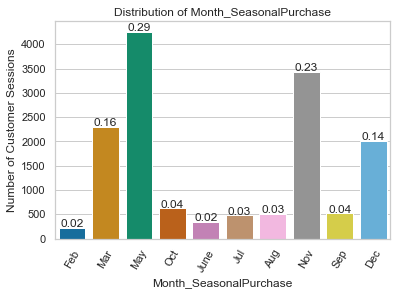

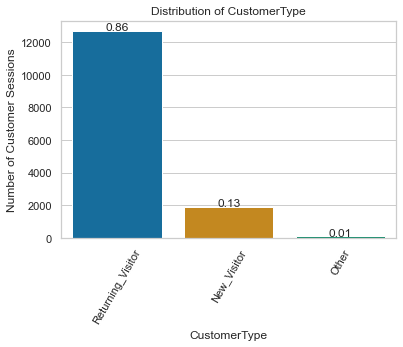

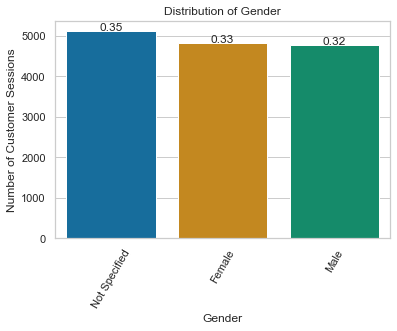

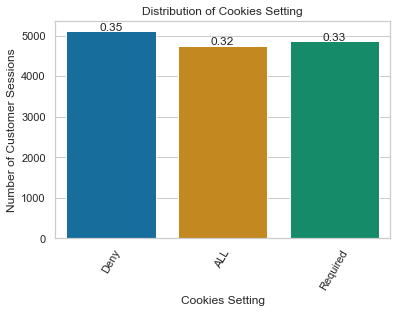

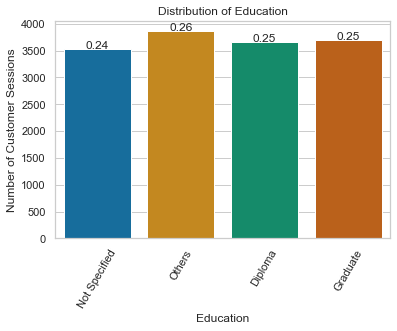

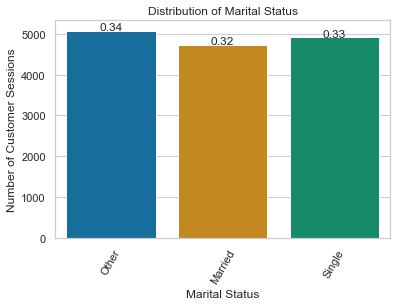

In [891]:
# Plot distributions of categorical variables.
for var in cat_df.columns:
    ax = sns.countplot(x = df[var], data = df, palette = 'colorblind')
    total = float(len(df[var])) 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 10,
                '{:1.2f}'.format(height/total),
                ha="center")
    plt.title('Distribution of ' + str(var))
    plt.ylabel('Number of Customer Sessions')
    plt.xticks(rotation = 60)
    plt.show()

Most customers shop in the months of May and November.The intersting the Gender, education level and matrial status are equally of intersting in the shoping.

In [892]:
# Split the numeric variables.
num_df = [f for f in df.columns if df.dtypes[f] != 'object']

# Create dataframe for numeric variables.
num_df = df[num_df]

In [893]:
num_df.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

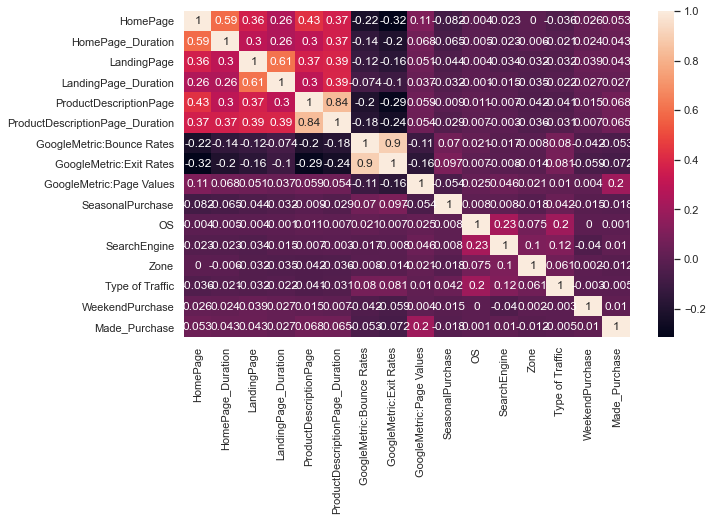

In [894]:
# Check for multicollinearity with a heatmap.
corr_matrix = round(num_df.corr(), 3)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Feature Engineering

1.Feature engineering in Machine Learning involves extracting useful features from given input data following the target to be learned and the machine learning model used. It involves transforming data to forms that better relate to the underlying target to be learned. 2.Features are transformed to a representation which is easily understood by machine learning algorithms.

#Label Encoding Provide integer numbers to different categories

In [895]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['CustomerType']= label_encoder.fit_transform(df['CustomerType'])
df

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,2,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,2,Female,Deny,Others,Married,0.0,False
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,2,Female,ALL,Others,Married,1.0,False
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,2,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,2,Male,Deny,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,2,Female,Deny,Others,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,2,Not Specified,ALL,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,2,Not Specified,Required,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,2,Not Specified,Required,Not Specified,Married,0.0,True


CustomerType column encode to following new_vistor to 0 Other to 1 Returning vistor to 2

In [896]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,2,2,Deny,Not Specified,Other,0.0,False
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,2,0,Deny,Others,Married,0.0,False
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,2,0,ALL,Others,Married,1.0,False
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,2,1,ALL,Diploma,Single,0.0,False
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,2,1,Deny,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,2,0,Deny,Others,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,2,2,ALL,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,2,2,Required,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,2,2,Required,Not Specified,Married,0.0,True


Gender column encode to following Femal to 0 Male to 1 not specifed to 2

In [897]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Cookies Setting']= label_encoder.fit_transform(df['Cookies Setting'])
df

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,2,2,1,Not Specified,Other,0.0,False
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,2,0,1,Others,Married,0.0,False
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,2,0,0,Others,Married,1.0,False
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,2,1,0,Diploma,Single,0.0,False
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,2,1,1,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,2,0,1,Others,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,2,2,0,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,2,2,2,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,2,2,2,Not Specified,Married,0.0,True


All=0 deny =1 required=2 other=3

In [898]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Education']= label_encoder.fit_transform(df['Education'])
df
df['Made_Purchase']= label_encoder.fit_transform(df['Made_Purchase'])
df

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,2,2,1,2,Other,0.0,0
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,2,0,1,3,Married,0.0,0
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,2,0,0,3,Married,1.0,0
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,2,1,0,0,Single,0.0,0
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,2,1,1,0,Other,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,2,0,1,3,Married,0.0,1
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,2,2,0,0,Married,0.0,1
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,2,2,2,3,Single,0.0,1
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,2,2,2,2,Married,0.0,1


Diploma=0 Graduate=1 Not specified=2 others=3

In [899]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Marital Status']= label_encoder.fit_transform(df['Marital Status'])
df

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,2,2,1,2,1,0.0,0
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,2,0,1,3,0,0.0,0
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,2,0,0,3,0,1.0,0
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,2,1,0,0,2,0.0,0
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,2,1,1,0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,2,0,1,3,0,0.0,1
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,2,2,0,0,0,0.0,1
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,2,2,2,3,2,0.0,1
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,2,2,2,2,0,0.0,1


Married=0 other=1 single=2

In [900]:
df.Month_SeasonalPurchase.dtype
df['Month_SeasonalPurchase'] = df['Month_SeasonalPurchase'].astype(str)

In [901]:
#df['Month_SeasonalPurchase']=pd.datetime(df['Month_SeasonalPurchase'], formate= "%m %H:%M")
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Month_SeasonalPurchase']= label_encoder.fit_transform(df['Month_SeasonalPurchase'])
df
#df['Month_SeasonalPurchase'] = pd.to_datetime(df['Month_SeasonalPurchase'])

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,2,2,1,2,1,0.0,0
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,2,0,1,3,0,0.0,0
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,2,0,0,3,0,1.0,0
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,2,1,0,0,2,0.0,0
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,2,1,1,0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,2,0,1,3,0,0.0,1
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,2,2,0,0,0,0.0,1
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,2,2,2,3,2,0.0,1
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,2,2,2,2,0,0.0,1


# outlier dedection


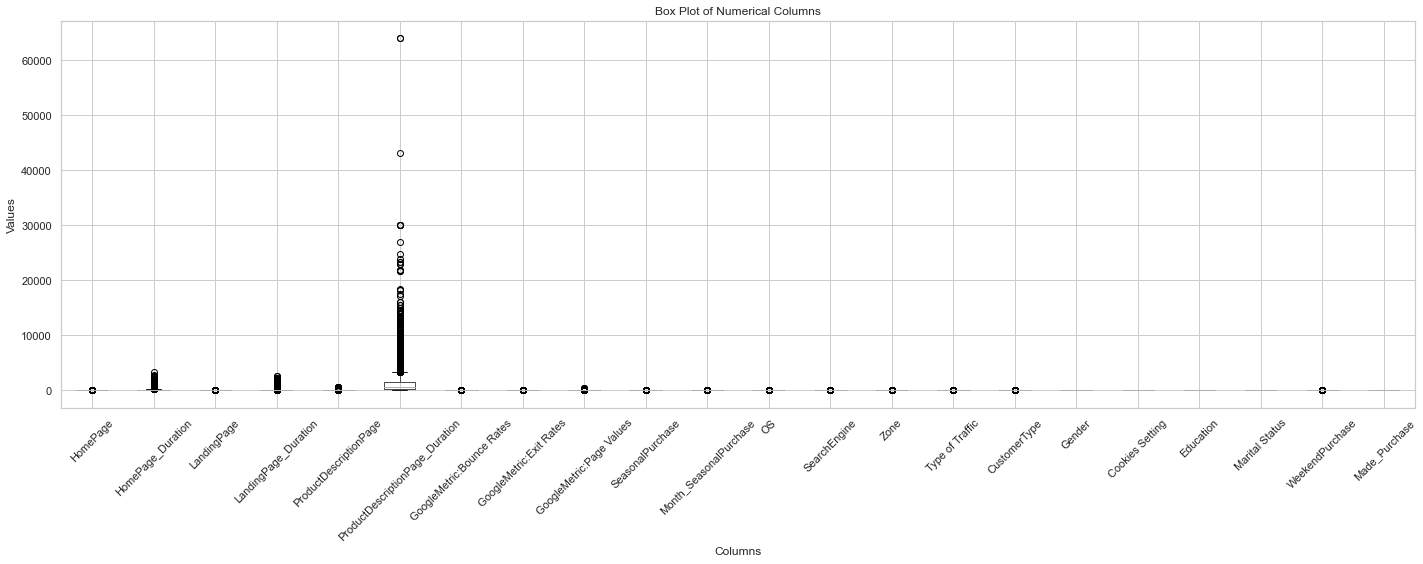

In [902]:
plt.figure(figsize=(20, 8))

# Plot box plot for all numerical columns
df.boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

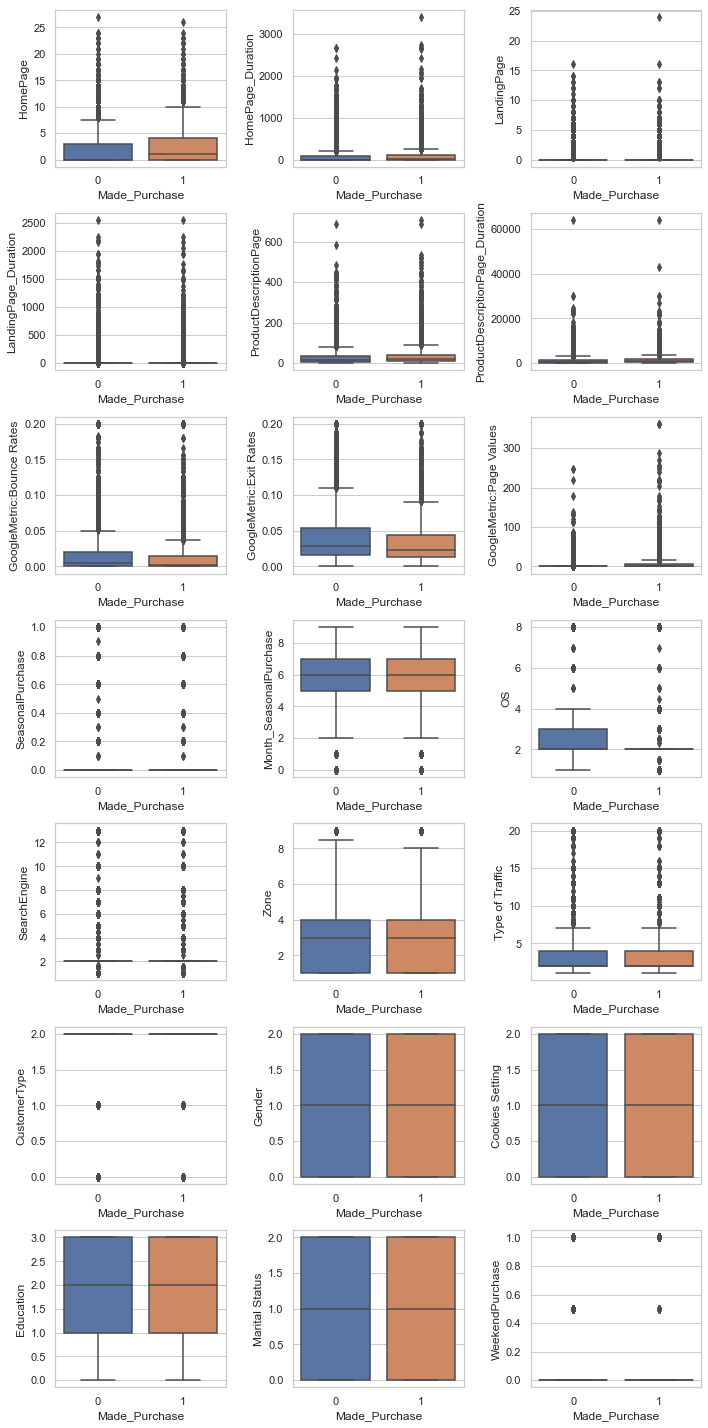

In [903]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,20))
plt.subplot(7,3,1)
sns.boxplot(x='Made_Purchase',y='HomePage',data=df)
plt.subplot(7,3,2)
sns.boxplot(x='Made_Purchase',y='HomePage_Duration',data=df)
plt.subplot(7,3,3)
sns.boxplot(x='Made_Purchase',y='LandingPage',data=df)
plt.subplot(7,3,4)
sns.boxplot(x='Made_Purchase',y='LandingPage_Duration',data=df)
plt.subplot(7,3,5)
sns.boxplot(x='Made_Purchase',y='ProductDescriptionPage',data=df)
plt.subplot(7,3,6)
sns.boxplot(x='Made_Purchase',y='ProductDescriptionPage_Duration',data=df)
plt.subplot(7,3,7)
sns.boxplot(x='Made_Purchase',y='GoogleMetric:Bounce Rates',data=df)
plt.subplot(7,3,8)
sns.boxplot(x='Made_Purchase',y='GoogleMetric:Exit Rates',data=df)
plt.subplot(7,3,9)
sns.boxplot(x='Made_Purchase',y='GoogleMetric:Page Values',data=df)
plt.subplot(7,3,10)
sns.boxplot(x='Made_Purchase',y='SeasonalPurchase',data=df)
plt.subplot(7,3,11)
sns.boxplot(x='Made_Purchase',y='Month_SeasonalPurchase',data=df)
plt.subplot(7,3,12)
sns.boxplot(x='Made_Purchase',y='OS',data=df)
plt.subplot(7,3,13)
sns.boxplot(x='Made_Purchase',y='SearchEngine',data=df)
plt.subplot(7,3,14)
sns.boxplot(x='Made_Purchase',y='Zone',data=df)
plt.subplot(7,3,15)
sns.boxplot(x='Made_Purchase',y='Type of Traffic',data=df)
plt.subplot(7,3,16)
sns.boxplot(x='Made_Purchase',y='CustomerType',data=df)
plt.subplot(7,3,17)
sns.boxplot(x='Made_Purchase',y='Gender',data=df)
plt.subplot(7,3,18)
sns.boxplot(x='Made_Purchase',y='Cookies Setting',data=df)
plt.subplot(7,3,19)
sns.boxplot(x='Made_Purchase',y='Education',data=df)
plt.subplot(7,3,20)
sns.boxplot(x='Made_Purchase',y='Marital Status',data=df)
plt.subplot(7,3,21)
sns.boxplot(x='Made_Purchase',y='WeekendPurchase',data=df)
plt.tight_layout()

In [904]:
# Calculate number of outliers and its percentage with Tukey's method.
for i, col in enumerate(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'], start=1):
    q75, q25 = np.percentile(df[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
                                                                            len((np.where((df[col] > max_val) | 
                                                                                           (df[col] < min_val))[0])),
                                                                             len((np.where((df[col] > max_val) | 
                                                                                           (df[col] < min_val))[0]))*100/12330))

Number of outliers and percentage of it in HomePage : 891 and 7.226277372262774
Number of outliers and percentage of it in HomePage_Duration : 1392 and 11.289537712895378
Number of outliers and percentage of it in LandingPage : 3112 and 25.23925385239254
Number of outliers and percentage of it in LandingPage_Duration : 2833 and 22.976480129764802
Number of outliers and percentage of it in ProductDescriptionPage : 1182 and 9.586374695863746
Number of outliers and percentage of it in ProductDescriptionPage_Duration : 1156 and 9.37550689375507
Number of outliers and percentage of it in GoogleMetric:Bounce Rates : 1856 and 15.05271695052717
Number of outliers and percentage of it in GoogleMetric:Exit Rates : 1433 and 11.6220600162206
Number of outliers and percentage of it in GoogleMetric:Page Values : 2862 and 23.21167883211679
Number of outliers and percentage of it in SeasonalPurchase : 1573 and 12.75750202757502
Number of outliers and percentage of it in Month_SeasonalPurchase : 2523 a

In [905]:
# Identify numerical columns for outlier detection
numerical_cols = df.select_dtypes(include='number').columns

# Initialize an empty DataFrame to store outliers
outliers_df = pd.DataFrame(columns=df.columns)

# Initialize an empty DataFrame to store non-outliers
non_outliers_df = pd.DataFrame(columns=df.columns)

# Detect outliers and separate them from non-outliers for each numerical column
for col in numerical_cols:
    # Calculate Z-scores for the current column
    z_scores = stats.zscore(df[col])
    # Define the threshold for outlier detection (e.g., 3 standard deviations)
    threshold = 3
    # Identify outliers
    outliers = (abs(z_scores) > threshold)
    # Store outliers and non-outliers in separate DataFrames
    outliers_df = pd.concat([outliers_df, df[outliers]])

outliers_df = outliers_df.drop_duplicates()

# Print the shapes of the outlier and non-outlier DataFrames
print("Shape of outliers DataFrame:", outliers_df.shape)
print("Shape of non-outliers DataFrame:", non_outliers_df.shape)


Shape of outliers DataFrame: (3243, 22)
Shape of non-outliers DataFrame: (0, 22)


In [906]:
upper_limit = df['HomePage'].mean() + 3*df['HomePage'].std()
lower_limit = df['HomePage'].mean() - 3*df['HomePage'].std()

df['HomePage'] = np.where(
    df['HomePage']>upper_limit,
    upper_limit,
    np.where(
        df['HomePage']<lower_limit,
        lower_limit,
        df['HomePage']
    )
)
df.shape

(14730, 22)

In [907]:
# Select records from df that are not in outliers_df
records_to_move = df.loc[~df.index.isin(outliers_df.index)]

# Concatenate the selected records to non_outliers_df
non_outliers_df = pd.concat([non_outliers_df, records_to_move])

# Print the shape of the updated non_outliers_df
print("Shape of non-outliers DataFrame after adding records:", non_outliers_df.shape)

Shape of non-outliers DataFrame after adding records: (11487, 22)


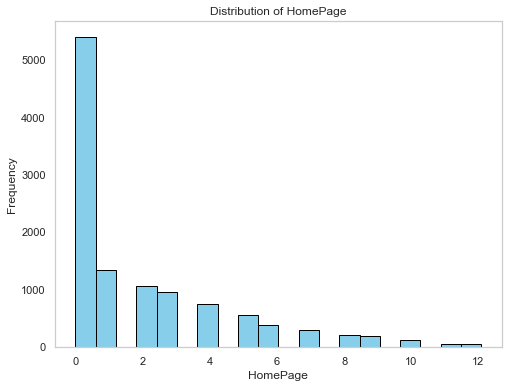

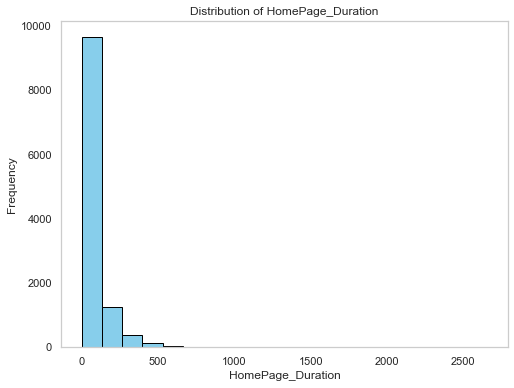

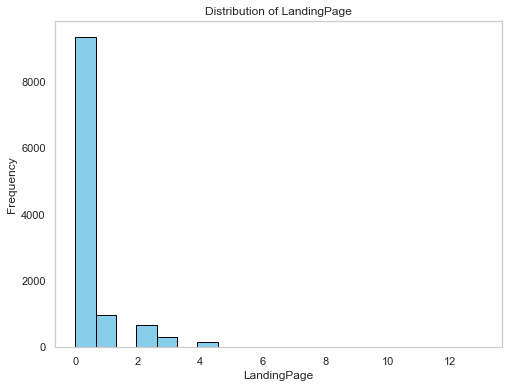

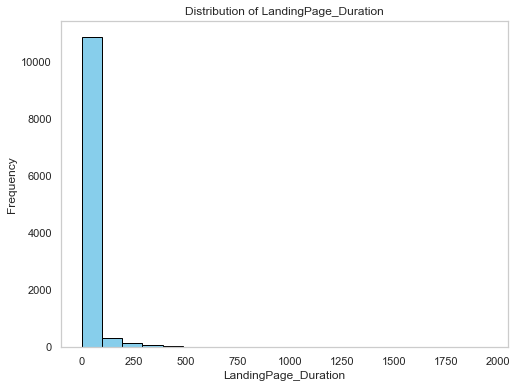

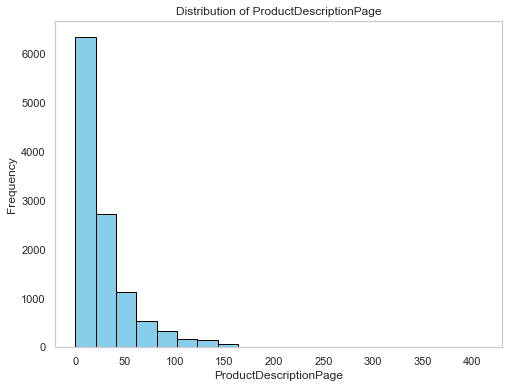

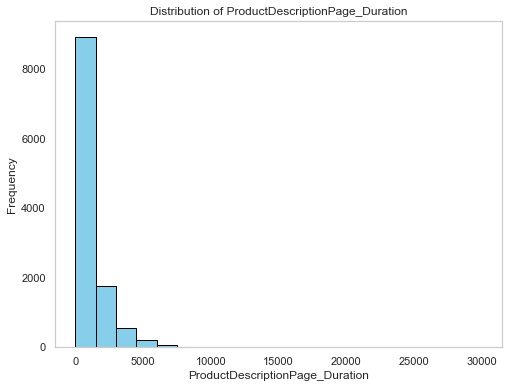

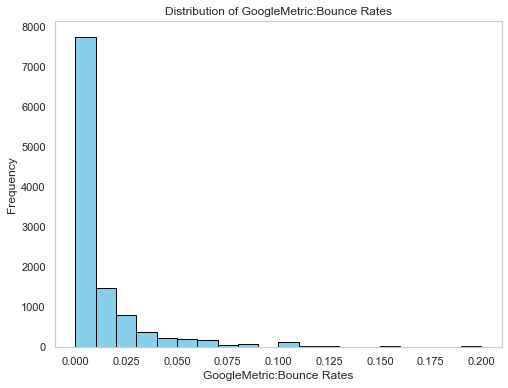

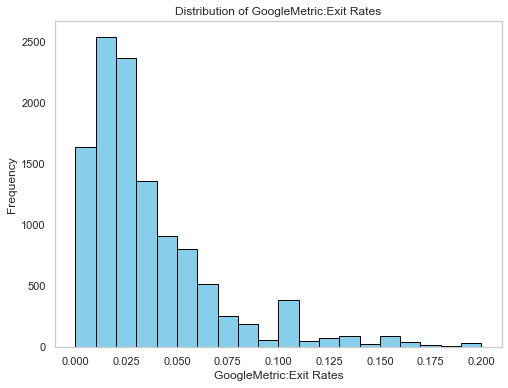

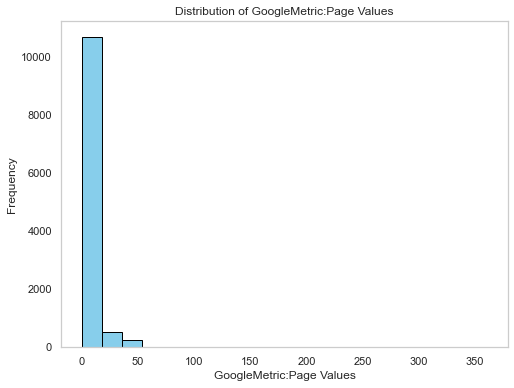

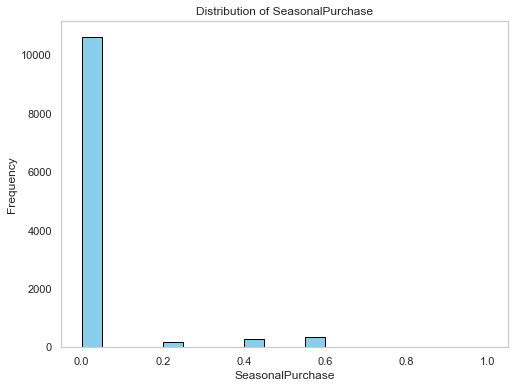

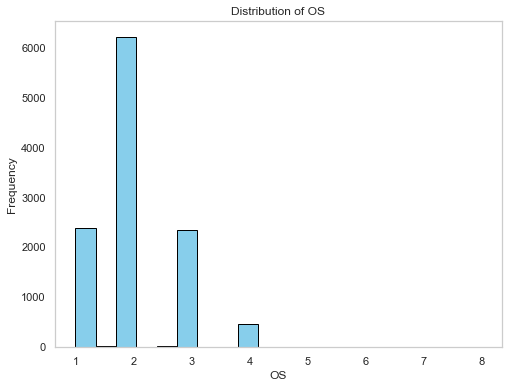

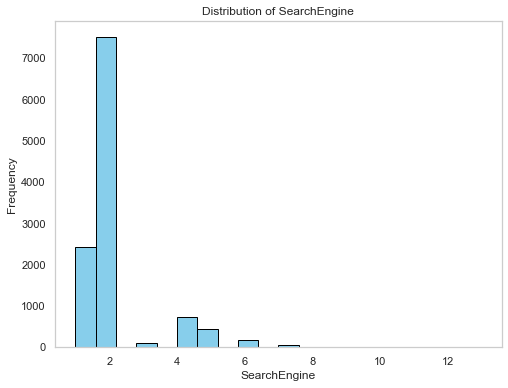

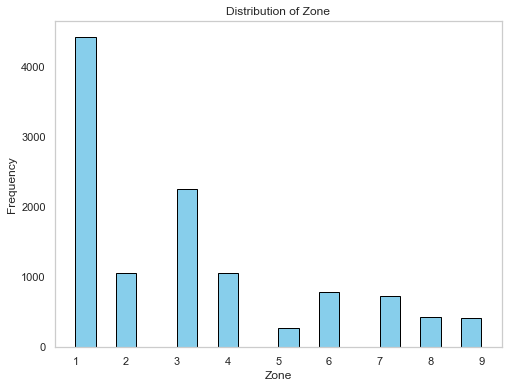

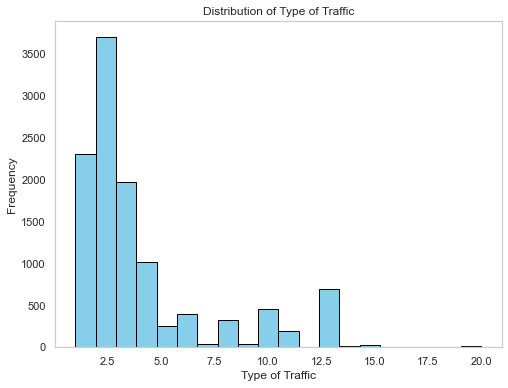

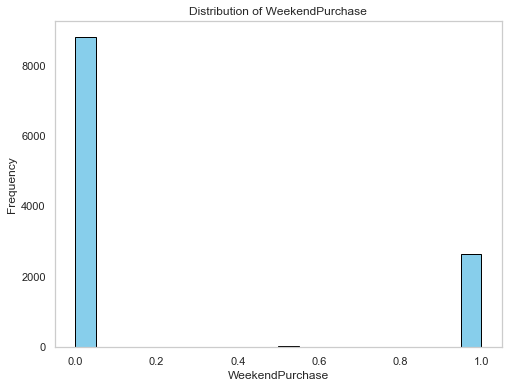

In [908]:
numerical_columns_non_outliers_df = non_outliers_df.select_dtypes(include='number').columns
# Plot the distribution for each numerical column
for column in numerical_columns_non_outliers_df:
    plt.figure(figsize=(8, 6))
    non_outliers_df[column].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


In [909]:
df.shape

(14730, 22)

In [910]:
# Step 1: Calculate the median value of each numerical column in non_outliers_df
median_values_numeric = non_outliers_df.select_dtypes(include='number').median()

# Step 2: Calculate the mode (most frequent value) of each categorical column in non_outliers_df
mode_values_categorical = non_outliers_df.select_dtypes(exclude='number').mode().iloc[0]


# Replace values in numerical columns with median values
for column in median_values_numeric.index:
    outliers_df[column] = median_values_numeric[column]

# Replace values in categorical columns with mode values
for column in mode_values_categorical.index:
    outliers_df[column] = mode_values_categorical[column]

# Print the mean and mode values for each column
print("Median values for numerical columns in non_outliers_df:")
print(median_values_numeric)
print("\nMode values for categorical columns in non_outliers_df:")
print(mode_values_categorical)

# Print the head of outliers_df_replaced to verify the replacement operation
print("\nHead of outliers_df_replaced after replacing values:")
print(outliers_df.head())


Median values for numerical columns in non_outliers_df:
HomePage                             1.000000
HomePage_Duration                    6.000000
LandingPage                          0.000000
LandingPage_Duration                 0.000000
ProductDescriptionPage              18.000000
ProductDescriptionPage_Duration    584.500000
GoogleMetric:Bounce Rates            0.001818
GoogleMetric:Exit Rates              0.025397
GoogleMetric:Page Values             0.000000
SeasonalPurchase                     0.000000
OS                                   2.000000
SearchEngine                         2.000000
Zone                                 3.000000
Type of Traffic                      2.000000
WeekendPurchase                      0.000000
dtype: float64

Mode values for categorical columns in non_outliers_df:
Month_SeasonalPurchase    6
CustomerType              2
Gender                    2
Cookies Setting           1
Education                 3
Marital Status            1
Made_Purchase 

In [911]:
# Concatenate outliers_df and non_outliers_df along the rows (axis=0)
combined_df = pd.concat([outliers_df, non_outliers_df])

# Reset index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

# Print the shape of the combined DataFrame to verify
print("Shape of the combined DataFrame:", combined_df.shape)

# Optionally, print the head of the combined DataFrame
print("\nHead of the combined DataFrame:")
print(combined_df.head())

Shape of the combined DataFrame: (14730, 22)

Head of the combined DataFrame:
   HomePage  HomePage_Duration  LandingPage  LandingPage_Duration  \
0       1.0                6.0          0.0                   0.0   
1       1.0                6.0          0.0                   0.0   
2       1.0                6.0          0.0                   0.0   
3       1.0                6.0          0.0                   0.0   
4       1.0                6.0          0.0                   0.0   

   ProductDescriptionPage  ProductDescriptionPage_Duration  \
0                    18.0                            584.5   
1                    18.0                            584.5   
2                    18.0                            584.5   
3                    18.0                            584.5   
4                    18.0                            584.5   

   GoogleMetric:Bounce Rates  GoogleMetric:Exit Rates  \
0                   0.001818                 0.025397   
1                   

In [912]:
df=combined_df.copy()
df.shape

(14730, 22)

In [913]:
df['Made_Purchase'] =df['Made_Purchase'].astype(int)

In [914]:
print(df['Made_Purchase'].dtype)

int64


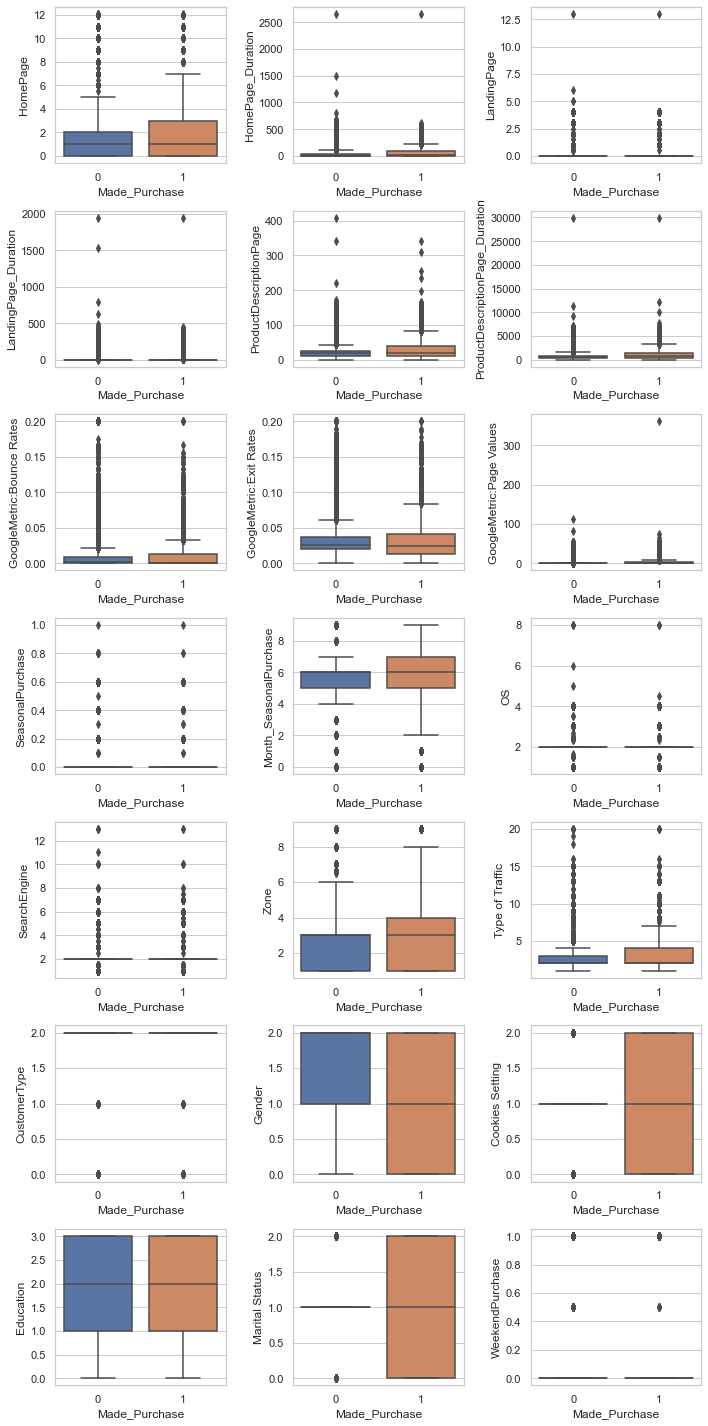

In [915]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,20))
plt.subplot(7,3,1)
sns.boxplot(x='Made_Purchase',y='HomePage',data=df)
plt.subplot(7,3,2)
sns.boxplot(x='Made_Purchase',y='HomePage_Duration',data=df)
plt.subplot(7,3,3)
sns.boxplot(x='Made_Purchase',y='LandingPage',data=df)
plt.subplot(7,3,4)
sns.boxplot(x='Made_Purchase',y='LandingPage_Duration',data=df)
plt.subplot(7,3,5)
sns.boxplot(x='Made_Purchase',y='ProductDescriptionPage',data=df)
plt.subplot(7,3,6)
sns.boxplot(x='Made_Purchase',y='ProductDescriptionPage_Duration',data=df)
plt.subplot(7,3,7)
sns.boxplot(x='Made_Purchase',y='GoogleMetric:Bounce Rates',data=df)
plt.subplot(7,3,8)
sns.boxplot(x='Made_Purchase',y='GoogleMetric:Exit Rates',data=df)
plt.subplot(7,3,9)
sns.boxplot(x='Made_Purchase',y='GoogleMetric:Page Values',data=df)
plt.subplot(7,3,10)
sns.boxplot(x='Made_Purchase',y='SeasonalPurchase',data=df)
plt.subplot(7,3,11)
sns.boxplot(x='Made_Purchase',y='Month_SeasonalPurchase',data=df)
plt.subplot(7,3,12)
sns.boxplot(x='Made_Purchase',y='OS',data=df)
plt.subplot(7,3,13)
sns.boxplot(x='Made_Purchase',y='SearchEngine',data=df)
plt.subplot(7,3,14)
sns.boxplot(x='Made_Purchase',y='Zone',data=df)
plt.subplot(7,3,15)
sns.boxplot(x='Made_Purchase',y='Type of Traffic',data=df)
plt.subplot(7,3,16)
sns.boxplot(x='Made_Purchase',y='CustomerType',data=df)
plt.subplot(7,3,17)
sns.boxplot(x='Made_Purchase',y='Gender',data=df)
plt.subplot(7,3,18)
sns.boxplot(x='Made_Purchase',y='Cookies Setting',data=df)
plt.subplot(7,3,19)
sns.boxplot(x='Made_Purchase',y='Education',data=df)
plt.subplot(7,3,20)
sns.boxplot(x='Made_Purchase',y='Marital Status',data=df)
plt.subplot(7,3,21)
sns.boxplot(x='Made_Purchase',y='WeekendPurchase',data=df)
plt.tight_layout()

In [916]:
# Calculate Z-scores for each numerical column in df
z_scores = df[numerical_cols].apply(lambda x: np.abs((x - x.mean()) / x.std()))

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers_combined = df[(z_scores > threshold).any(axis=1)]

# Count the number of outliers in combined_df
num_outliers_combined = len(outliers_combined)

# Print the number of outliers in combined_df
print("Number of outliers in the combined DataFrame:", num_outliers_combined)


Number of outliers in the combined DataFrame: 3535


In [917]:
from sklearn.preprocessing import OneHotEncoder

# Assuming X is your DataFrame containing categorical columns
# Assuming cat_cols is a list of categorical column names

# Step 1: Identify categorical columns
cat_cols = ['Month_SeasonalPurchase', 'CustomerType','Gender','Cookies Setting','Education','Marital Status']

# Step 2: Apply OneHotEncoder to transform categorical columns
onehot_encoder = OneHotEncoder()
df_cat_encoded = onehot_encoder.fit_transform(df[cat_cols])


feature_names = []
for cat in onehot_encoder.categories_:
    feature_names.extend(cat)
    
    
# Step 3: Convert encoded features to DataFrame and concatenate with original DataFrame
df_cat_encoded_df = pd.DataFrame(df_cat_encoded.toarray(), columns=feature_names)
df1 = pd.concat([df.drop(columns=cat_cols), df_cat_encoded_df], axis=1)


In [918]:
upper_limit = df['LandingPage'].mean() + 3*df['LandingPage'].std()
lower_limit = df['LandingPage'].mean() - 3*df['LandingPage'].std()

df['LandingPage'] = np.where(
    df['LandingPage']>upper_limit,
    upper_limit,
    np.where(
        df['LandingPage']<lower_limit,
        lower_limit,
        df['LandingPage']
    )
)
df.shape

(14730, 22)

In [919]:
upper_limit = df['LandingPage_Duration'].mean() + 3*df['LandingPage_Duration'].std()
lower_limit = df['LandingPage_Duration'].mean() - 3*df['LandingPage_Duration'].std()

df['LandingPage_Duration'] = np.where(
    df['LandingPage_Duration']>upper_limit,
    upper_limit,
    np.where(
        df['LandingPage_Duration']<lower_limit,
        lower_limit,
        df['LandingPage_Duration']
    )
)
df.shape

(14730, 22)

In [920]:
upper_limit = df['ProductDescriptionPage'].mean() + 3*df['ProductDescriptionPage'].std()
lower_limit = df['ProductDescriptionPage'].mean() - 3*df['ProductDescriptionPage'].std()

df['ProductDescriptionPage'] = np.where(
    df['ProductDescriptionPage']>upper_limit,
    upper_limit,
    np.where(
        df['ProductDescriptionPage']<lower_limit,
        lower_limit,
        df['ProductDescriptionPage']
    )
)
df.shape

(14730, 22)

In [921]:
upper_limit = df['ProductDescriptionPage_Duration'].mean() + 3*df['ProductDescriptionPage_Duration'].std()
lower_limit = df['ProductDescriptionPage_Duration'].mean() - 3*df['ProductDescriptionPage_Duration'].std()

df['ProductDescriptionPage_Duration'] = np.where(
    df['ProductDescriptionPage_Duration']>upper_limit,
    upper_limit,
    np.where(
        df['ProductDescriptionPage_Duration']<lower_limit,
        lower_limit,
        df['ProductDescriptionPage_Duration']
    )
)
df.shape

(14730, 22)

In [922]:
upper_limit = df['GoogleMetric:Bounce Rates'].mean() + 3*df['GoogleMetric:Bounce Rates'].std()
lower_limit = df['GoogleMetric:Bounce Rates'].mean() - 3*df['GoogleMetric:Bounce Rates'].std()

df['GoogleMetric:Bounce Rates'] = np.where(
    df['GoogleMetric:Bounce Rates']>upper_limit,
    upper_limit,
    np.where(
        df['GoogleMetric:Bounce Rates']<lower_limit,
        lower_limit,
        df['GoogleMetric:Bounce Rates']
    )
)
df.shape

(14730, 22)

In [923]:
upper_limit = df['GoogleMetric:Exit Rates'].mean() + 3*df['GoogleMetric:Exit Rates'].std()
lower_limit = df['GoogleMetric:Bounce Rates'].mean() - 3*df['GoogleMetric:Exit Rates'].std()

df['GoogleMetric:Exit Rates'] = np.where(
    df['GoogleMetric:Exit Rates']>upper_limit,
    upper_limit,
    np.where(
        df['GoogleMetric:Exit Rates']<lower_limit,
        lower_limit,
        df['GoogleMetric:Exit Rates']
    )
)
df.shape

(14730, 22)

In [924]:
upper_limit = df['GoogleMetric:Page Values'].mean() + 3*df['GoogleMetric:Page Values'].std()
lower_limit = df['GoogleMetric:Page Values'].mean() - 3*df['GoogleMetric:Page Values'].std()

df['GoogleMetric:Page Values'] = np.where(
    df['GoogleMetric:Page Values']>upper_limit,
    upper_limit,
    np.where(
        df['GoogleMetric:Page Values']<lower_limit,
        lower_limit,
        df['GoogleMetric:Page Values']
    )
)
df.shape

(14730, 22)

In [925]:
upper_limit = df['SeasonalPurchase'].mean() + 3*df['SeasonalPurchase'].std()
lower_limit = df['SeasonalPurchase'].mean() - 3*df['SeasonalPurchase'].std()

df['SeasonalPurchase'] = np.where(
    df['SeasonalPurchase']>upper_limit,
    upper_limit,
    np.where(
        df['SeasonalPurchase']<lower_limit,
        lower_limit,
        df['SeasonalPurchase']
    )
)
df.shape

(14730, 22)

In [926]:
upper_limit = df['Month_SeasonalPurchase'].mean() + 3*df['Month_SeasonalPurchase'].std()
lower_limit = df['Month_SeasonalPurchase'].mean() - 3*df['Month_SeasonalPurchase'].std()

df['Month_SeasonalPurchase'] = np.where(
    df['Month_SeasonalPurchase']>upper_limit,
    upper_limit,
    np.where(
        df['Month_SeasonalPurchase']<lower_limit,
        lower_limit,
        df['Month_SeasonalPurchase']
    )
)
df.shape

(14730, 22)

In [927]:
upper_limit = df['OS'].mean() + 3*df['OS'].std()
lower_limit = df['OS'].mean() - 3*df['OS'].std()

df['OS'] = np.where(
    df['OS']>upper_limit,
    upper_limit,
    np.where(
        df['OS']<lower_limit,
        lower_limit,
        df['OS']
    )
)
df.shape

(14730, 22)

In [928]:
upper_limit = df['SearchEngine'].mean() + 3*df['SearchEngine'].std()
lower_limit = df['SearchEngine'].mean() - 3*df['SearchEngine'].std()

df['SearchEngine'] = np.where(
    df['SearchEngine']>upper_limit,
    upper_limit,
    np.where(
        df['SearchEngine']<lower_limit,
        lower_limit,
        df['SearchEngine']
    )
)
df.shape

(14730, 22)

In [929]:
upper_limit = df['Zone'].mean() + 3*df['Zone'].std()
lower_limit = df['Zone'].mean() - 3*df['Zone'].std()

df['Zone'] = np.where(
    df['Zone']>upper_limit,
    upper_limit,
    np.where(
        df['Zone']<lower_limit,
        lower_limit,
        df['Zone']
    )
)
df.shape

(14730, 22)

In [930]:
upper_limit = df['Type of Traffic'].mean() + 3*df['Type of Traffic'].std()
lower_limit = df['Type of Traffic'].mean() - 3*df['Type of Traffic'].std()

df['Type of Traffic'] = np.where(
    df['Type of Traffic']>upper_limit,
    upper_limit,
    np.where(
        df['Type of Traffic']<lower_limit,
        lower_limit,
        df['Type of Traffic']
    )
)
df.shape

(14730, 22)

In [931]:
upper_limit = df['CustomerType'].mean() + 3*df['CustomerType'].std()
lower_limit = df['CustomerType'].mean() - 3*df['CustomerType'].std()

df['CustomerType'] = np.where(
    df['CustomerType']>upper_limit,
    upper_limit,
    np.where(
        df['CustomerType']<lower_limit,
        lower_limit,
        df['CustomerType']
    )
)
df.shape

(14730, 22)

In [932]:
upper_limit = df['Gender'].mean() + 3*df['Gender'].std()
lower_limit = df['Gender'].mean() - 3*df['Gender'].std()

df['Gender'] = np.where(
    df['Gender']>upper_limit,
    upper_limit,
    np.where(
        df['Gender']<lower_limit,
        lower_limit,
        df['Gender']
    )
)
df.shape

(14730, 22)

In [933]:
upper_limit = df['Cookies Setting'].mean() + 3*df['Cookies Setting'].std()
lower_limit = df['Cookies Setting'].mean() - 3*df['Cookies Setting'].std()

df['Cookies Setting'] = np.where(
    df['Cookies Setting']>upper_limit,
    upper_limit,
    np.where(
        df['Cookies Setting']<lower_limit,
        lower_limit,
        df['Cookies Setting']
    )
)
df.shape

(14730, 22)

In [934]:
upper_limit = df['Education'].mean() + 3*df['Education'].std()
lower_limit = df['Education'].mean() - 3*df['Education'].std()

df['Education'] = np.where(
    df['Education']>upper_limit,
    upper_limit,
    np.where(
        df['Education']<lower_limit,
        lower_limit,
        df['Education']
    )
)
df.shape

(14730, 22)

In [935]:
upper_limit = df['Marital Status'].mean() + 3*df['Marital Status'].std()
lower_limit = df['Marital Status'].mean() - 3*df['Marital Status'].std()

df['Marital Status'] = np.where(
    df['Marital Status']>upper_limit,
    upper_limit,
    np.where(
        df['Marital Status']<lower_limit,
        lower_limit,
        df['Marital Status']
    )
)
df.shape


(14730, 22)

In [936]:
upper_limit = df['WeekendPurchase'].mean() + 3*df['WeekendPurchase'].std()
lower_limit = df['WeekendPurchase'].mean() - 3*df['WeekendPurchase'].std()

df['WeekendPurchase'] = np.where(
    df['WeekendPurchase']>upper_limit,
    upper_limit,
    np.where(
        df['WeekendPurchase']<lower_limit,
        lower_limit,
        df['WeekendPurchase']
    )
)
df.shape

(14730, 22)

In [937]:
upper_limit = df['Made_Purchase'].mean() + 3*df['Made_Purchase'].std()
lower_limit = df['Made_Purchase'].mean() - 3*df['Made_Purchase'].std()

df['Made_Purchase'] = np.where(
    df['Made_Purchase']>upper_limit,
    upper_limit,
    np.where(
        df['Made_Purchase']<lower_limit,
        lower_limit,
        df['Made_Purchase']
    )
)
df.shape

(14730, 22)

In [938]:
#print("Mean value of HomePage_Duration",df['HomePage_Duration'].mean())
#print("Standard deviation of HomePage_Duration",df['HomePage_Duration'].std())
#print("Minimum value of HomePage_Duration",df['HomePage_Duration'].min())
#print("Maximum value of HomePage_Duration",df['HomePage_Duration'].max())
#print("Upper limit",df['HomePage_Duration'].mean() + 3*df['HomePage_Duration'].std())
#print("Lower limit",df['HomePage_Duration'].mean() - 3*df['HomePage_Duration'].std())
#df=df[(df['HomePage_Duration'] > 8.80) | (df['HomePage_Duration'] < 5.11)]
#df



In [939]:
#print("Mean value of LandingPage",df['LandingPage'].mean())
#print("Standard deviation of LandingPage",df['LandingPage'].std())
#print("Minimum value of LandingPage",df['LandingPage'].min())
#print("Maximum value of LandingPage",df['LandingPage'].max())
#print("Upper limit",df['LandingPage'].mean() + 3*df['LandingPage'].std())
#print("Lower limit",df['LandingPage'].mean() - 3*df['LandingPage'].std())
#df=df[(df['LandingPage'] > 8.80) | (df['LandingPage'] < 5.11)]
#df

In [940]:
#print("Mean value of LandingPage_Duration",df['LandingPage_Duration'].mean())
#print("Standard deviation of LandingPage_Duration",df['LandingPage_Duration'].std())
#print("Minimum value of LandingPage_Duration",df['LandingPage_Duration'].min())
#print("Maximum value of LandingPage_Duration",df['LandingPage_Duration'].max())
#print("Upper limit",df['LandingPage_Duration'].mean() + 3*df['LandingPage_Duration'].std())
#print("Lower limit",df['LandingPage_Duration'].mean() - 3*df['LandingPage_Duration'].std())
#df=df[(df['LandingPage_Duration'] > 8.80) | (df['LandingPage_Duration'] < 5.11)]
#df

In [941]:
#print("Mean value of ProductDescriptionPage",df['ProductDescriptionPage'].mean())
#print("Standard deviation of ProductDescriptionPage",df['ProductDescriptionPage'].std())
#print("Minimum value of ProductDescriptionPage",df['ProductDescriptionPage'].min())
#print("Maximum value of ProductDescriptionPage",df['ProductDescriptionPage'].max())
#print("Upper limit",df['ProductDescriptionPage'].mean() + 3*df['ProductDescriptionPage'].std())
#print("Lower limit",df['ProductDescriptionPage'].mean() - 3*df['ProductDescriptionPage'].std())
#df=df[(df['ProductDescriptionPage'] > 8.80) | (df['ProductDescriptionPage'] < 5.11)]
#df

In [942]:
#print("Mean value of ProductDescriptionPage_Duration",df['ProductDescriptionPage_Duration'].mean())
#print("Standard deviation of ProductDescriptionPage_Duration",df['ProductDescriptionPage_Duration'].std())
#print("Minimum value of ProductDescriptionPage_Duration",df['ProductDescriptionPage_Duration'].min())
#print("Maximum value of ProductDescriptionPage_Duration",df['ProductDescriptionPage_Duration'].max())
#print("Upper limit",df['ProductDescriptionPage_Duration'].mean() + 3*df['ProductDescriptionPage_Duration'].std())
#print("Lower limit",df['ProductDescriptionPage_Duration'].mean() - 3*df['ProductDescriptionPage_Duration'].std())
#df=df[(df['ProductDescriptionPage_Duration'] > 8.80) | (df['ProductDescriptionPage_Duration'] < 5.11)]
#df

In [943]:
#print("Mean value of GoogleMetric:Bounce Rates",df['GoogleMetric:Bounce Rates'].mean())
#print("Standard deviation of GoogleMetric:Bounce Rates",df['GoogleMetric:Bounce Rates'].std())
#print("Minimum value of GoogleMetric:Bounce Rates",df['GoogleMetric:Bounce Rates'].min())
#print("Maximum value of GoogleMetric:Bounce Rates",df['GoogleMetric:Bounce Rates'].max())
#print("Upper limit",df['GoogleMetric:Bounce Rates'].mean() + 3*df['GoogleMetric:Bounce Rates'].std())
#print("Lower limit",df['GoogleMetric:Bounce Rates'].mean() - 3*df['GoogleMetric:Bounce Rates'].std())
#df=df[(df['GoogleMetric:Bounce Rates'] > 8.80) | (df['GoogleMetric:Bounce Rates'] < 5.11)]
#df

In [944]:
#print("Mean value of GoogleMetric:Exit Rates",df['GoogleMetric:Exit Rates'].mean())
#print("Standard deviation of GoogleMetric:Exit Rates",df['GoogleMetric:Exit Rates'].std())
#print("Minimum value of GoogleMetric:Exit Rates",df['GoogleMetric:Exit Rates'].min())
#print("Maximum value of GoogleMetric:Exit Rates",df['GoogleMetric:Exit Rates'].max())
#print("Upper limit",df['GoogleMetric:Exit Rates'].mean() + 3*df['GoogleMetric:Exit Rates'].std())
#print("Lower limit",df['GoogleMetric:Exit Rates'].mean() - 3*df['GoogleMetric:Exit Rates'].std())
#df=df[(df['GoogleMetric:Exit Rates'] > 8.80) | (df['GoogleMetric:Exit Rates'] < 5.11)]
#df

In [945]:
#print("GoogleMetric:Page Values",df['GoogleMetric:Page Values'].mean())
#print("Standard deviation of GoogleMetric:Page Values",df['GoogleMetric:Page Values'].std())
#print("Minimum value of GoogleMetric:Exit Rates",df['GoogleMetric:Page Values'].min())
#print("Maximum value of GoogleMetric:Page Values",df['GoogleMetric:Page Values'].max())
#print("Upper limit",df['GoogleMetric:Page Values'].mean() + 3*df['GoogleMetric:Page Values'].std())
#print("Lower limit",df['GoogleMetric:Page Values'].mean() - 3*df['GoogleMetric:Page Values'].std())
#df=df[(df['GoogleMetric:Page Values'] > 8.80) | (df['GoogleMetric:Page Values'] < 5.11)]
#df

In [946]:
#print("SeasonalPurchase",df['SeasonalPurchase'].mean())
#print("Standard deviation of SeasonalPurchase",df['SeasonalPurchase'].std())
#print("Minimum value of SeasonalPurchase",df['SeasonalPurchase'].min())
#print("Maximum value of SeasonalPurchase",df['SeasonalPurchase'].max())
#print("Upper limit",df['SeasonalPurchase'].mean() + 3*df['SeasonalPurchase'].std())
#print("Lower limit",df['SeasonalPurchase'].mean() - 3*df['SeasonalPurchase'].std())
#df=df[(df['SeasonalPurchase'] > 8.80) | (df['SeasonalPurchase'] < 5.11)]
#df

In [947]:
#print("SearchEngine",df['SearchEngine'].mean())
#print("SearchEngine",df['SearchEngine'].std())
#print("SearchEngine",df['SearchEngine'].min())
#print("SearchEngine",df['SearchEngine'].max())
#print("Upper limit",df['SearchEngine'].mean() + 3*df['SearchEngine'].std())
#print("Lower limit",df['SearchEngine'].mean() - 3*df['SearchEngine'].std())
#df=df[(df['SearchEngine'] > 8.80) | (df['SearchEngine'] < 5.11)]
#df

In [948]:
#print("Zone",df['Zone'].mean())
#print("Zone",df['Zone'].std())
#print("Zone",df['Zone'].min())
#print("Zone",df['Zone'].max())
#print("Upper limit",df['Zone'].mean() + 3*df['Zone'].std())
#print("Lower limit",df['Zone'].mean() - 3*df['Zone'].std())
#df=df[(df['Zone'] > 8.80) | (df['Zone'] < 5.11)]
#df

In [949]:
#print("Type of Traffic",df['Type of Traffic'].mean())
#print("Type of Traffic",df['Type of Traffic'].std())
#print("Type of Traffic",df['Type of Traffic'].min())
#print("Type of Traffic",df['Type of Traffic'].max())
#print("Upper limit",df['Type of Traffic'].mean() + 3*df['Type of Traffic'].std())
#print("Lower limit",df['Type of Traffic'].mean() - 3*df['Type of Traffic'].std())
#df=df[(df['Type of Traffic'] > 8.80) | (df['Type of Traffic'] < 5.11)]
#df

In [950]:
#print("Type of Traffic",df['Type of Traffic'].mean())
#print("Type of Traffic",df['Type of Traffic'].std())
#print("Type of Traffic",df['Type of Traffic'].min())
#print("Type of Traffic",df['Type of Traffic'].max())
#print("Upper limit",df['Type of Traffic'].mean() + 3*df['Type of Traffic'].std())
#print("Lower limit",df['Type of Traffic'].mean() - 3*df['Type of Traffic'].std())
#df=df[(df['Type of Traffic'] > 8.80) | (df['Type of Traffic'] < 5.11)]
#df

In [951]:
# Calculate number of outliers and its percentage with Tukey's method.
for i, col in enumerate(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'], start=1):
    q75, q25 = np.percentile(df[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
                                                                            len((np.where((df[col] > max_val) | 
                                                                                           (df[col] < min_val))[0])),
                                                                             len((np.where((df[col] > max_val) | 
                                                                                           (df[col] < min_val))[0]))*100/12330))

Number of outliers and percentage of it in HomePage : 1367 and 11.086780210867802
Number of outliers and percentage of it in HomePage_Duration : 1663 and 13.48742903487429
Number of outliers and percentage of it in LandingPage : 2133 and 17.2992700729927
Number of outliers and percentage of it in LandingPage_Duration : 1897 and 15.385239253852392
Number of outliers and percentage of it in ProductDescriptionPage : 1417 and 11.492295214922953
Number of outliers and percentage of it in ProductDescriptionPage_Duration : 1456 and 11.80859691808597
Number of outliers and percentage of it in GoogleMetric:Bounce Rates : 1706 and 13.83617193836172
Number of outliers and percentage of it in GoogleMetric:Exit Rates : 1343 and 10.89213300892133
Number of outliers and percentage of it in GoogleMetric:Page Values : 1923 and 15.59610705596107
Number of outliers and percentage of it in SeasonalPurchase : 845 and 6.853203568532035
Number of outliers and percentage of it in Month_SeasonalPurchase : 3495

In [952]:
df.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [953]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [954]:
#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(14730, 22)

# Feature Scaling¶

First we should see if data is normally distruibted or not
to choose scalling techingue: Feature scaling is nothing other than transforming the numerical features into a small range of values.

Scaling the features helps the model to converge faster.
Normalization is scaling the data to be between 0 and 1. It is preferred when the data has not a normal distribution
Standardization is scaling the data to have 0 mean and unit standard deviation. It is preferred when the data has a normal or gaussian distribution.
Robust scaling technique is used if the data has many outliers.
In most cases, the choice of scaling technique won't make much difference (or it can). Try all of them and see what work best with your data.
Only the features are scaled. The labels should not be scaled.
Make sure to not fit the scaler on test data. Only transfom

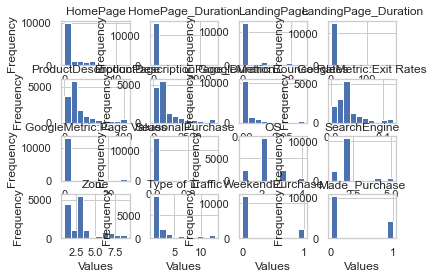

In [955]:
# Plot histograms of all columns in the DataFrame
df.hist()

# Set the title and axis labels for each histogram
for ax in plt.gcf().axes:
   ax.set_title(ax.get_title().replace('Histogram of ', ''))
   ax.set_xlabel('Values')
   ax.set_ylabel('Frequency')
   
# Display the histograms
plt.show()

It is clear the data are not normally distributed so we will use Normalization technigue

In [956]:
df.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [957]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(df)
num_scaled[:5]
data1=pd.DataFrame(num_scaled, columns= [['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase']])
data1

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.082733,0.002258,0.000000,0.000000,0.173569,0.139525,0.023751,0.212440,0.0,0.0,...,0.242018,0.250,0.084734,1.0,1.0,0.5,1.000000,0.5,0.0,0.0
1,0.082733,0.002258,0.000000,0.000000,0.173569,0.139525,0.023751,0.212440,0.0,0.0,...,0.242018,0.250,0.084734,1.0,1.0,0.5,1.000000,0.5,0.0,0.0
2,0.082733,0.002258,0.000000,0.000000,0.173569,0.139525,0.023751,0.212440,0.0,0.0,...,0.242018,0.250,0.084734,1.0,1.0,0.5,1.000000,0.5,0.0,0.0
3,0.082733,0.002258,0.000000,0.000000,0.173569,0.139525,0.023751,0.212440,0.0,0.0,...,0.242018,0.250,0.084734,1.0,1.0,0.5,1.000000,0.5,0.0,0.0
4,0.082733,0.002258,0.000000,0.000000,0.173569,0.139525,0.023751,0.212440,0.0,0.0,...,0.242018,0.250,0.084734,1.0,1.0,0.5,1.000000,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,0.000000,0.000000,0.000000,0.000000,0.038571,0.016471,0.000000,0.418241,0.0,0.0,...,0.000000,0.000,0.084734,1.0,1.0,0.0,1.000000,0.5,0.0,1.0
14726,0.082733,0.001505,0.000000,0.000000,0.376066,0.234683,0.200972,0.147213,0.0,0.0,...,0.242018,0.625,0.169469,1.0,0.0,0.5,1.000000,0.0,0.0,1.0
14727,0.661861,0.044038,0.787823,0.332855,0.106070,0.060367,0.000000,0.092669,0.0,0.0,...,0.242018,0.125,0.254203,1.0,1.0,0.0,0.000000,0.0,0.0,1.0
14728,0.000000,0.000000,0.000000,0.000000,0.057856,0.252314,0.000000,0.278827,0.0,0.0,...,0.726055,0.375,0.000000,1.0,1.0,1.0,0.666667,0.0,0.0,1.0


# Target Variable Analysis¶

In [958]:
# Display value count of target variable.
df['Made_Purchase'].value_counts()

0.0    10445
1.0     4285
Name: Made_Purchase, dtype: int64

In [959]:
# Percent breakdown of the Made_Purchase rates.
Made_Purchase = df['Made_Purchase'].value_counts()/df.shape[0]
print(Made_Purchase)

0.0    0.709097
1.0    0.290903
Name: Made_Purchase, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


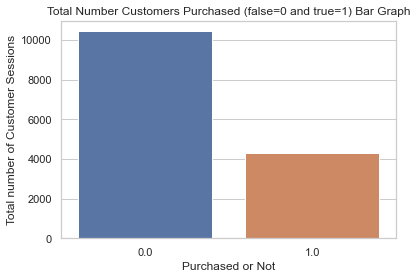

In [960]:
# Create bar graph of the Revenue.
sns.countplot('Made_Purchase', data = df)
plt.xlabel('Purchased or Not')
plt.ylabel('Total number of Customer Sessions')
plt.title('Total Number Customers Purchased (false=0 and true=1) Bar Graph')
plt.show()

In [961]:
df.groupby('Made_Purchase').agg(['mean','median'])

HomePage        HomePage_Duration        LandingPage         \
                   mean median              mean median        mean median   
Made_Purchase                                                                
0.0            1.637125    1.0         41.322290   6.00    0.198502    0.0   
1.0            2.131409    1.0         64.108352  14.75    0.338380    0.0   

              LandingPage_Duration        ProductDescriptionPage         ...  \
                              mean median                   mean median  ...   
Made_Purchase                                                            ...   
0.0                       7.649169    0.0              23.129781   18.0  ...   
1.0                      13.586140    0.0              28.423690   19.0  ...   

                     OS        SearchEngine             Zone         \
                   mean median         mean median      mean median   
Made_Purchase                                                         
0.0            2.056201    2.0     2.075070    2.0  3.102617    3.0   
1.0            2.083348    2.0     2.117293    2.0  3.118514    3.0   

              Type of Traffic        WeekendPurchase         
                         mean median            mean median  
Made_Purchase                                                
0.0                  3.232541    2.0        0.157922    0.0  
1.0                  3.706493    2.0        0.234889    0.0  

[2 rows x 30 columns]

# Feature selection

In [962]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array = data1.values
X = array[:,0:21]
Y = array[:,21]
# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model,n_features_to_select=10)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
data=pd.DataFrame(df, columns=['HomePage', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates','Month_SeasonalPurchase', 'OS','SearchEngine', 'Zone',
'CustomerType', 'Gender', 'Education'])
data

Num Features: 10
Selected Features: [False  True False False  True  True False  True  True False False False
 False False  True  True  True False  True False  True]
Feature Ranking: [ 5  1  4 11  1  1  3  1  1  2  6 10  7 12  1  1  1  9  1  8  1]


,HomePage,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,Month_SeasonalPurchase,OS,SearchEngine,Zone,CustomerType,Gender,Education
0,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3
1,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3
2,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3
3,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3
4,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...
14725,0.0,0.000000,0.050000,5,1.0,1.0,1.0,2,2,3
14726,1.0,0.015385,0.017599,7,3.0,2.0,6.0,2,0,3
14727,8.0,0.000000,0.011078,6,2.0,2.0,2.0,2,2,0
14728,0.0,0.000000,0.033333,5,2.0,4.0,4.0,2,2,2


In [963]:
data.columns


Index(['HomePage', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'CustomerType',
       'Gender', 'Education'],
      dtype='object')

In [964]:
#Extract a column from the first DataFrame
extracted_col = df['Made_Purchase']
 
# Display the column to be added from the first DataFrame to the second DataFrame
print("Column to be added from the first DataFrame to the second DataFrame:")
display(extracted_col)
 
# Add the extracted column to the second DataFrame
data = pd.concat([data, extracted_col.rename("Made_Purchase")], axis=1)
 
# Display the second DataFrame after adding the column from the first DataFrame
print("Second DataFrame after adding the column from the first DataFrame:")
display(data)

Column to be added from the first DataFrame to the second DataFrame:


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14725    1.0
14726    1.0
14727    1.0
14728    1.0
14729    1.0
Name: Made_Purchase, Length: 14730, dtype: float64

Second DataFrame after adding the column from the first DataFrame:


,HomePage,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,Month_SeasonalPurchase,OS,SearchEngine,Zone,CustomerType,Gender,Education,Made_Purchase
0,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3,0.0
1,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3,0.0
2,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3,0.0
3,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3,0.0
4,1.0,0.001818,0.025397,6,2.0,2.0,3.0,2,2,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14725,0.0,0.000000,0.050000,5,1.0,1.0,1.0,2,2,3,1.0
14726,1.0,0.015385,0.017599,7,3.0,2.0,6.0,2,0,3,1.0
14727,8.0,0.000000,0.011078,6,2.0,2.0,2.0,2,2,0,1.0
14728,0.0,0.000000,0.033333,5,2.0,4.0,4.0,2,2,2,1.0


In [965]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
HomePage,0,0.0
GoogleMetric:Bounce Rates,0,0.0
GoogleMetric:Exit Rates,0,0.0
Month_SeasonalPurchase,0,0.0
OS,0,0.0
SearchEngine,0,0.0
Zone,0,0.0
CustomerType,0,0.0
Gender,0,0.0
Education,0,0.0


In [966]:
target = 'Made_Purchase'
x=df.drop('Made_Purchase',axis=1)
y=df['Made_Purchase']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [967]:
print(x_train.shape)
print(y_train.shape)

(11784, 21)
(11784,)


In [968]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [969]:
data.columns

Index(['HomePage', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'CustomerType',
       'Gender', 'Education', 'Made_Purchase'],
      dtype='object')

In [970]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

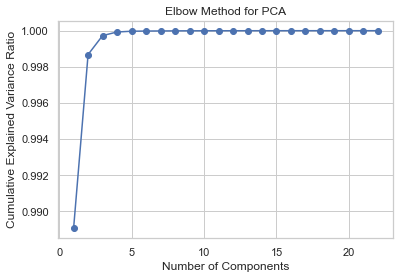

In [971]:
# Perform PCA with a range of different numbers of components
n_components_range = range(1, min(df.shape[0], df.shape[1]) + 1)
explained_variances = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(df)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the cumulative explained variance ratio against the number of components
plt.plot(n_components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Method for PCA')
plt.show()


In [1109]:
pca=PCA(n_components=2)
pca_train = pca.fit_transform(x_train)
pca_test = pca.fit_transform(x_test)
train = (x_train)
test = (x_test)


# Random Forest without Cross Validation

In [1110]:
rf = RandomForestClassifier(n_estimators=66,random_state=0)
rf.fit(train,y_train)
y_pred_train = rf.predict(train)
rf.score(train,y_train)
rf_accuracy = round(rf.score(train,y_train)*100,2)
print(rf_accuracy)

89.06


In [1111]:
confusion_matrix(y_train,y_pred_train)

array([[7919,  429],
       [ 860, 2576]])

In [1112]:
from sklearn.metrics import classification_report
report = classification_report(y_train,y_pred_train,digits=3)
print(report)

              precision    recall  f1-score   support

         0.0      0.902     0.949     0.925      8348
         1.0      0.857     0.750     0.800      3436

    accuracy                          0.891     11784
   macro avg      0.880     0.849     0.862     11784
weighted avg      0.889     0.891     0.888     11784



In [1113]:
y_pred_test = rf.predict(test)
rf.score(test,y_test)
rf_accuracy = round(rf.score(test,y_test)*100,2)
print(rf_accuracy)

63.95


In [1114]:
confusion_matrix(y_test,y_pred_test)

array([[1676,  421],
       [ 641,  208]])

In [1115]:
from sklearn.metrics import classification_report
report1 = classification_report(y_test,y_pred_test,digits=3)
print(report1)

              precision    recall  f1-score   support

         0.0      0.723     0.799     0.759      2097
         1.0      0.331     0.245     0.281       849

    accuracy                          0.640      2946
   macro avg      0.527     0.522     0.520      2946
weighted avg      0.610     0.640     0.622      2946



# Random Forest with Cross Validation

In [1116]:
rf1 = RandomForestClassifier(n_estimators=67,random_state=0)
CVS=cross_val_score(rf1,train,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
print("The mean accuracy is: ",CVS.mean())
rf1_CVS=round(CVS.mean()*100,2)
CVP=cross_val_predict(rf1,train,y_train,cv=3)
confusion_matrix(y_train,CVP)

[0.65682281 0.66064155 0.6614053 ]
The mean accuracy is:  0.6596232179226069


array([[6953, 1395],
       [2616,  820]])

In [1117]:
rf1.fit(train,y_train)

RandomForestClassifier(n_estimators=67, random_state=0)

In [1118]:
report1 = classification_report(y_train,CVP,digits=3)
print(report1)

              precision    recall  f1-score   support

         0.0      0.727     0.833     0.776      8348
         1.0      0.370     0.239     0.290      3436

    accuracy                          0.660     11784
   macro avg      0.548     0.536     0.533     11784
weighted avg      0.623     0.660     0.634     11784



In [1119]:
rf1.score(test,y_test)
rf1_accuracy_test = round(rf1.score(test,y_test)*100,2)
print(rf1_accuracy_test)

64.05


In [1120]:
y_pred = rf1.predict(test)

In [1121]:
confusion_matrix(y_pred,y_test)

array([[1675,  637],
       [ 422,  212]])

In [1122]:
report2 = classification_report(y_test,y_pred,digits=3)
print(report2)

              precision    recall  f1-score   support

         0.0      0.724     0.799     0.760      2097
         1.0      0.334     0.250     0.286       849

    accuracy                          0.641      2946
   macro avg      0.529     0.524     0.523      2946
weighted avg      0.612     0.641     0.623      2946



# Naive Bayes without cross validation¶

In [1123]:
gaussian = GaussianNB()
gaussian.fit(train, y_train)
y_pred_GNB = gaussian.predict(train)
gaussian.score(train, y_train)
acc_gaussian = round(gaussian.score(train, y_train) * 100, 2)
print(acc_gaussian)

68.62


In [1124]:
confusion_matrix(y_train,y_pred_GNB)

array([[6657, 1691],
       [2007, 1429]])

In [1125]:
report1_GNB = classification_report(y_train,y_pred_GNB,digits=3)
print(report1_GNB)

              precision    recall  f1-score   support

         0.0      0.768     0.797     0.783      8348
         1.0      0.458     0.416     0.436      3436

    accuracy                          0.686     11784
   macro avg      0.613     0.607     0.609     11784
weighted avg      0.678     0.686     0.682     11784



In [1126]:
y_pred_test_GNB = gaussian.predict(test)
gaussian.score(test, y_test)
acc_gaussian = round(gaussian.score(test, y_test) * 100, 2)
print(acc_gaussian)

69.79


In [1127]:
confusion_matrix(y_test,y_pred_test_GNB)

array([[1706,  391],
       [ 499,  350]])

In [1128]:
report2_GNB = classification_report(y_test,y_pred_test_GNB,digits=3)
print(report2_GNB)


              precision    recall  f1-score   support

         0.0      0.774     0.814     0.793      2097
         1.0      0.472     0.412     0.440       849

    accuracy                          0.698      2946
   macro avg      0.623     0.613     0.617      2946
weighted avg      0.687     0.698     0.691      2946



# Naive Bayes with Cross Validation

In [1129]:
gaussian1 = GaussianNB()
CVS_nb=cross_val_score(gaussian1,train,y_train,cv=5)
print(CVS_nb)                                                                      #Cross Validation
print("The mean accuracy is: ",CVS_nb.mean())
nb_CVS = round(CVS_nb.mean()*100,2)
CVP_nb=cross_val_predict(gaussian1,train,y_train,cv=5)
confusion_matrix(y_train,CVP_nb)

[0.66991939 0.68858719 0.68858719 0.67798048 0.69736842]
The mean accuracy is:  0.6844885335953375


array([[6652, 1696],
       [2022, 1414]])

In [1130]:
gaussian1.fit(train,y_train)

GaussianNB()

In [1131]:
gaussian1.score(test,y_test)
gaussian1_accuracy_test = round(gaussian1.score(test,y_test)*100,2)
print(gaussian1_accuracy_test)

69.79


In [1132]:
y_pred_nb = gaussian1.predict(test)

In [1133]:
confusion_matrix(y_pred_nb,y_test)

array([[1706,  499],
       [ 391,  350]])

In [1134]:
report2_nb = classification_report(y_test,y_pred_nb,digits=3)
print(report2_nb)

              precision    recall  f1-score   support

         0.0      0.774     0.814     0.793      2097
         1.0      0.472     0.412     0.440       849

    accuracy                          0.698      2946
   macro avg      0.623     0.613     0.617      2946
weighted avg      0.687     0.698     0.691      2946



# Logistic Regression without cross validation

In [1135]:
logreg = LogisticRegression()
logreg.fit(train, y_train)
acc_log = round(logreg.score(train, y_train) * 100, 2)
print(acc_log)

72.91


In [1136]:
y_pred_LG_train = logreg.predict(train)
confusion_matrix(y_train, y_pred_LG_train)

array([[7936,  412],
       [2780,  656]])

In [1137]:
#decisiontree=DecisionTreeClassifier()
#decisiontree.fit(principalComponents_test,y_test)
Y_pred=decisiontree.predict(principalComponents_test)
acc_dt_test=round(decisiontree.score(principalComponents_test, y_test) * 100, 2)
print(acc_dt_test)

NameError: name 'decisiontree' is not defined

In [1138]:
print(classification_report(y_train, y_pred_LG_train, digits=3))

              precision    recall  f1-score   support

         0.0      0.741     0.951     0.833      8348
         1.0      0.614     0.191     0.291      3436

    accuracy                          0.729     11784
   macro avg      0.677     0.571     0.562     11784
weighted avg      0.704     0.729     0.675     11784



In [1139]:
y_pred_LG_test = logreg.predict(test)
acc_log2 = round(logreg.score(test, y_test) * 100, 2)
print(acc_log2)

73.76


In [1140]:
confusion_matrix(y_test, y_pred_LG_test)

array([[2002,   95],
       [ 678,  171]])

In [1141]:
print(classification_report(y_test, y_pred_LG_test, digits=3))

              precision    recall  f1-score   support

         0.0      0.747     0.955     0.838      2097
         1.0      0.643     0.201     0.307       849

    accuracy                          0.738      2946
   macro avg      0.695     0.578     0.572      2946
weighted avg      0.717     0.738     0.685      2946



# Logistic Regression with Cross Validation

In [1142]:
logreg1 = LogisticRegression()
CVS_lr=cross_val_score(logreg1,train,y_train,cv=3)
print(CVS_lr)                                                                      #Cross Validation
print("The mean accuracy is: ",CVS_lr.mean())
lr_CVS = round(CVS_lr.mean()*100,2)
CVP_lr=cross_val_predict(logreg1,train,y_train,cv=3)
confusion_matrix(y_train,CVP_lr)

[0.72937882 0.72479633 0.72683299]
The mean accuracy is:  0.7270027155465036


array([[7914,  434],
       [2783,  653]])

In [1143]:
logreg1.fit(train,y_train)

LogisticRegression()

In [1144]:
report1_lr = classification_report(y_train,CVP_lr,digits=3)
print(report1_lr)

              precision    recall  f1-score   support

         0.0      0.740     0.948     0.831      8348
         1.0      0.601     0.190     0.289      3436

    accuracy                          0.727     11784
   macro avg      0.670     0.569     0.560     11784
weighted avg      0.699     0.727     0.673     11784



In [1145]:
logreg1.score(test,y_test)
logreg1_accuracy_test = round(logreg1.score(test,y_test)*100,2)
print(logreg1_accuracy_test)

73.76


In [1146]:
y_pred_lr = logreg1.predict(test)


In [1147]:
confusion_matrix(y_pred_lr,y_test)

array([[2002,  678],
       [  95,  171]])

In [1148]:
report2_lr = classification_report(y_test,y_pred_lr,digits=3)
print(report2_lr)
     


              precision    recall  f1-score   support

         0.0      0.747     0.955     0.838      2097
         1.0      0.643     0.201     0.307       849

    accuracy                          0.738      2946
   macro avg      0.695     0.578     0.572      2946
weighted avg      0.717     0.738     0.685      2946



# Decision Tree without Cross validation¶

In [1149]:
dt=DecisionTreeClassifier(random_state=0,max_depth=38)
dt.fit(train,y_train)
acc_dt=round(dt.score(train, y_train) * 100, 2)
print(acc_dt)
     

88.89


In [1150]:

     
y_pred_dt = dt.predict(train)
confusion_matrix(y_train, y_pred_dt)

array([[8327,   21],
       [1288, 2148]])

In [1151]:
print(classification_report(y_train, y_pred_dt, digits=3))

              precision    recall  f1-score   support

         0.0      0.866     0.997     0.927      8348
         1.0      0.990     0.625     0.766      3436

    accuracy                          0.889     11784
   macro avg      0.928     0.811     0.847     11784
weighted avg      0.902     0.889     0.880     11784



In [1152]:
y_pred_dt_test = dt.predict(test)
acc_dt2 = round(dt.score(test, y_test) * 100, 2)
print(acc_dt2)

40.05


In [1153]:
confusion_matrix(y_test, y_pred_dt_test)

array([[ 937, 1160],
       [ 606,  243]])

In [1154]:
print(classification_report(y_test, y_pred_dt_test, digits=3))

              precision    recall  f1-score   support

         0.0      0.607     0.447     0.515      2097
         1.0      0.173     0.286     0.216       849

    accuracy                          0.401      2946
   macro avg      0.390     0.367     0.365      2946
weighted avg      0.482     0.401     0.429      2946



# Decision Tree with Cross Validation

In [1155]:
dt1 = DecisionTreeClassifier(random_state=0,max_depth=38)
CVS_dt=cross_val_score(dt1,train,y_train,cv=3)
print(CVS_dt)                                                                      #Cross Validation
print("The mean accuracy is: ",CVS_dt.mean())
dt_CVS = round(CVS_dt.mean()*100,2)
CVP_dt=cross_val_predict(dt1,train,y_train,cv=3)
confusion_matrix(y_train,CVP_dt)

[0.60565173 0.59674134 0.60794297]
The mean accuracy is:  0.6034453496266124


array([[6127, 2221],
       [2452,  984]])

In [1156]:
dt1.fit(train,y_train)

DecisionTreeClassifier(max_depth=38, random_state=0)

In [1157]:
report1_dt = classification_report(y_train,CVP_dt,digits=3)
print(report1_dt)

              precision    recall  f1-score   support

         0.0      0.714     0.734     0.724      8348
         1.0      0.307     0.286     0.296      3436

    accuracy                          0.603     11784
   macro avg      0.511     0.510     0.510     11784
weighted avg      0.595     0.603     0.599     11784



In [1158]:
dt1.score(test,y_test)
dt1_accuracy_test = round(dt1.score(test,y_test)*100,2)
print(dt1_accuracy_test)

40.05


In [1159]:
y_pred_dt = dt1.predict(test)

In [1160]:
confusion_matrix(y_pred_dt,y_test)

array([[ 937,  606],
       [1160,  243]])

In [1161]:
report2_dt = classification_report(y_test,y_pred_dt,digits=3)
print(report2_dt)

              precision    recall  f1-score   support

         0.0      0.607     0.447     0.515      2097
         1.0      0.173     0.286     0.216       849

    accuracy                          0.401      2946
   macro avg      0.390     0.367     0.365      2946
weighted avg      0.482     0.401     0.429      2946



# Linear SVM without Cross Validation

In [1162]:
svm=LinearSVC(random_state=0)
svm.fit(train,y_train)
acc_svm=round(svm.score(train, y_train) * 100, 2)
print(acc_svm)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


73.12


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1163]:
y_pred_svm = svm.predict(train)
confusion_matrix(y_train, y_pred_svm)

array([[7985,  363],
       [2804,  632]])

In [1164]:
print(classification_report(y_train, y_pred_svm, digits=3))


              precision    recall  f1-score   support

         0.0      0.740     0.957     0.835      8348
         1.0      0.635     0.184     0.285      3436

    accuracy                          0.731     11784
   macro avg      0.688     0.570     0.560     11784
weighted avg      0.710     0.731     0.674     11784



In [1165]:
y_pred_svm_test = svm.predict(test)
acc_svm2 = round(svm.score(test, y_test) * 100, 2)
print(acc_svm2)

74.1


In [1166]:
confusion_matrix(y_test, y_pred_svm_test)

array([[2016,   81],
       [ 682,  167]])

In [1167]:
print(classification_report(y_test, y_pred_svm_test, digits=3))

              precision    recall  f1-score   support

         0.0      0.747     0.961     0.841      2097
         1.0      0.673     0.197     0.304       849

    accuracy                          0.741      2946
   macro avg      0.710     0.579     0.573      2946
weighted avg      0.726     0.741     0.686      2946



# Linear SVM with Cross Validation

In [1168]:
svm1 = LinearSVC(random_state=0)
CVS_svm=cross_val_score(svm1,train,y_train,cv=10)
print(CVS_svm)                                                                      #Cross Validation
print("The mean accuracy is: ",CVS_svm.mean())
svm_CVS = round(CVS_svm.mean()*100,2)
CVP_svm=cross_val_predict(svm1,train,y_train,cv=10)
confusion_matrix(y_train,CVP_svm)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

[0.74045802 0.71755725 0.73791349 0.71755725 0.72495756 0.74108659
 0.72665535 0.73429542 0.72750424 0.73174873]
The mean accuracy is:  0.7299733882847972


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3

array([[7979,  369],
       [2813,  623]])

In [1169]:
svm1.fit(train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [1170]:
report1_svm = classification_report(y_train,CVP_svm,digits=3)
print(report1_svm)

              precision    recall  f1-score   support

         0.0      0.739     0.956     0.834      8348
         1.0      0.628     0.181     0.281      3436

    accuracy                          0.730     11784
   macro avg      0.684     0.569     0.558     11784
weighted avg      0.707     0.730     0.673     11784



In [1171]:
svm1.score(test,y_test)
svm1_accuracy_test = round(svm1.score(test,y_test)*100,2)
print(svm1_accuracy_test)

74.1


In [1172]:
y_pred_svm = svm1.predict(test)

In [1173]:
confusion_matrix(y_pred_svm,y_test)

array([[2016,  682],
       [  81,  167]])

In [1174]:
report2_svm = classification_report(y_test,y_pred_svm,digits=3)
print(report2_svm)

              precision    recall  f1-score   support

         0.0      0.747     0.961     0.841      2097
         1.0      0.673     0.197     0.304       849

    accuracy                          0.741      2946
   macro avg      0.710     0.579     0.573      2946
weighted avg      0.726     0.741     0.686      2946



In [1175]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'Gaussian Naive Bayes',
              'Decision Tree',
              'LinearSVC'
              ],
    'Training_Score': [ lr_CVS, rf1_CVS, nb_CVS, dt_CVS ,svm_CVS]})
result_df = results.sort_values(by='Training_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Training_Score
Model,
LinearSVC,73.00
Logistic Regression,72.70
Gaussian Naive Bayes,68.45
Random Forest,65.96
Decision Tree,60.34


In [1176]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'Gaussian Naive Bayes',
              'Decision Tree',
              'LinearSVC'
              ],
    'Testing_Score': [ logreg1_accuracy_test, rf1_accuracy_test, gaussian1_accuracy_test, dt1_accuracy_test ,svm1_accuracy_test]})
result_df = results.sort_values(by='Testing_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Testing_Score
Model,
LinearSVC,74.10
Logistic Regression,73.76
Gaussian Naive Bayes,69.79
Random Forest,64.05
Decision Tree,40.05
